<a href="https://colab.research.google.com/github/Felipedeor/AD4-Audiovisual/blob/main/AD4_Audiovisual_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
from google.cloud import bigquery
from google.colab import auth
import matplotlib.pyplot as plt

In [ ]:
#Realizando a autenticação e definindo o projeto
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
query_extracao = pd.read_csv('/content/bq-results-20240226-133932-1708954852604.csv')

In [ ]:
#Realizando a consulta no BigQuery
df = query_extracao

In [ ]:
#Transformando a consulta em um dataframe do Pandas
df

,snapshot_date,name,artists,daily_rank,daily_movement,weekly_movement,popularity,is_explicit,duration_ms,album_release_date,energy
0,2024-02-26,Baby Eu Tava na Rua da Água,"TR, Mc Menor RV, Tropa da W&S",1,0,1,86,True,115846,2023-12-01,0.703
1,2024-02-26,Perna Bamba,"Parangolé, Leo Santana",2,2,-1,78,False,127220,2023-12-15,0.894
2,2024-02-26,Passada de Mão - Ao Vivo,"Dilsinho, Ana Castela",10,-2,14,78,False,163575,2024-02-01,0.707
3,2024-02-26,Lua,"Ana Castela, Hungria, Alok",11,2,39,69,False,206538,2024-02-16,0.837
4,2024-02-26,Maliciosa - Ao Vivo,LUDMILLA,13,-1,37,0,False,167027,2024-02-20,0.814
...,...,...,...,...,...,...,...,...,...,...,...
6598,2023-12-17,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,6,8,44,73,False,265450,2023-10-12,0.805
6599,2023-12-16,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,14,6,36,72,False,265450,2023-10-12,0.805
6600,2023-12-15,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,20,0,30,71,False,265450,2023-10-12,0.805
6601,2023-12-14,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,20,23,30,70,False,265450,2023-10-12,0.805


In [ ]:
#Convertendo o campo de data para o formato adequado
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

#Filtrando pelo mês de janeiro de 2024
df = df[(df['snapshot_date'] >= '2024-01-01') & (df['snapshot_date'] <= '2024-01-31')]

In [ ]:
#Renomeando as colunas
novos_nomes = {'snapshot_date':'data','name':'nome','artists':'artistas','daily_rank':'ranking_diario','daily_movement':'movimento_diario','weekly_movement':'movimento_semanal','popularity':'popularidade','is_explicit':'explicito','duration_ms':'duracao','album_release_date':'lancamento','energy':'energia'}
df.rename(columns=novos_nomes, inplace=True)

#convertendo o campo de lançamento para o formato correto
df['lancamento'] = pd.to_datetime(df['lancamento'])
display(df)

<ipython-input-12-3e8d7d6efab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=novos_nomes, inplace=True)
<ipython-input-12-3e8d7d6efab6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lancamento'] = pd.to_datetime(df['lancamento'])


,data,nome,artistas,ranking_diario,movimento_diario,movimento_semanal,popularidade,explicito,duracao,lancamento,energia
281,2024-01-31,Baby Eu Tava na Rua da Água,"TR, Mc Menor RV, Tropa da W&S",16,5,34,75,True,116307,2023-12-01,0.703
282,2024-01-31,Ritmista 1.0,"DJ WN, MC Hariel, MC Ryan SP, MC Paulin da Cap...",24,7,26,78,True,615810,2023-11-22,0.510
283,2024-01-31,Nuuu Que Trem Bão - Ao vivo,Léo & Raphael,31,13,19,68,False,132247,2024-01-26,0.910
284,2024-01-31,Sai Da Frente,Juliette,37,13,-6,66,False,167445,2023-08-25,0.815
285,2024-01-31,Silverado (AgroPlay Verão),"AgroPlay, Luan Pereira",41,-1,9,71,False,162194,2024-01-18,0.819
...,...,...,...,...,...,...,...,...,...,...,...
6579,2024-01-05,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,4,-1,-3,87,False,265450,2023-10-12,0.805
6580,2024-01-04,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,3,-2,-2,86,False,265450,2023-10-12,0.805
6581,2024-01-03,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,1,0,0,85,False,265450,2023-10-12,0.805
6582,2024-01-02,Me Leva Pra Casa / Escrito Nas Estrelas / Saud...,Lauana Prado,1,1,0,85,False,265450,2023-10-12,0.805


In [ ]:
df.drop_duplicates(subset=['nome'])

,data,nome,artistas,ranking_diario,movimento_diario,movimento_semanal,popularidade,explicito,duracao,lancamento,energia
281,2024-01-31,Baby Eu Tava na Rua da Água,"TR, Mc Menor RV, Tropa da W&S",16,5,34,75,True,116307,2023-12-01,0.703
282,2024-01-31,Ritmista 1.0,"DJ WN, MC Hariel, MC Ryan SP, MC Paulin da Cap...",24,7,26,78,True,615810,2023-11-22,0.510
283,2024-01-31,Nuuu Que Trem Bão - Ao vivo,Léo & Raphael,31,13,19,68,False,132247,2024-01-26,0.910
284,2024-01-31,Sai Da Frente,Juliette,37,13,-6,66,False,167445,2023-08-25,0.815
285,2024-01-31,Silverado (AgroPlay Verão),"AgroPlay, Luan Pereira",41,-1,9,71,False,162194,2024-01-18,0.819
...,...,...,...,...,...,...,...,...,...,...,...
6124,2024-01-31,Devia Ser Proibido - Ao Vivo Em Brasília,Henrique & Juliano,30,-7,-4,84,False,173967,2023-07-28,0.922
6253,2024-01-31,Quase Algo - Ao Vivo Em Nova Iorque / 2022,Henrique & Juliano,42,-7,-3,72,False,178251,2023-12-15,0.760
6333,2024-01-31,Solteiro Forçado - Boiadeira Internacional,Ana Castela,33,-4,-3,84,False,194582,2023-07-07,0.669
6456,2024-01-31,Bênçãos Que Não Têm Fim (Counting My Blessings),Isadora Pompeo,23,19,-5,84,False,209520,2023-11-09,0.609


In [ ]:
# Verificando se existe valores nulos no dataset
porcentagemNulos = (df.isnull() / len(df)) * 100
print(round(porcentagemNulos,1))

      data  nome  artistas  ranking_diario  movimento_diario  \
281    0.0   0.0       0.0             0.0               0.0   
282    0.0   0.0       0.0             0.0               0.0   
283    0.0   0.0       0.0             0.0               0.0   
284    0.0   0.0       0.0             0.0               0.0   
285    0.0   0.0       0.0             0.0               0.0   
...    ...   ...       ...             ...               ...   
6579   0.0   0.0       0.0             0.0               0.0   
6580   0.0   0.0       0.0             0.0               0.0   
6581   0.0   0.0       0.0             0.0               0.0   
6582   0.0   0.0       0.0             0.0               0.0   
6583   0.0   0.0       0.0             0.0               0.0   

      movimento_semanal  popularidade  explicito  duracao  lancamento  energia  
281                 0.0           0.0        0.0      0.0         0.0      0.0  
282                 0.0           0.0        0.0      0.0         0.0

In [ ]:
df.dtypes

data                 datetime64[ns]
nome                         object
artistas                     object
ranking_diario                int64
movimento_diario              int64
movimento_semanal             int64
popularidade                  int64
explicito                      bool
duracao                       int64
lancamento           datetime64[ns]
energia                     float64
dtype: object

In [ ]:
# Quais foram os artistas que tiveram um movimento diario maior
df.groupby('artistas')['movimento_diario'].sum().sort_values(ascending=False)

artistas
Ivete Sangalo, LUDMILLA                          76
Diego & Victor Hugo, Guilherme & Benuto          49
George Henrique & Rodrigo, Guilherme & Benuto    48
AgroPlay, Ana Castela, LUDMILLA                  43
Kelvin e Gustavo, Ícaro e Gilmar                 42
                                                 ..
Luan Santana                                    -17
GREGO, Paulo Pires, ÉaBest                      -18
Zé Felipe, Luan Pereira, DENNIS                 -29
Simone Mendes                                   -32
Traia Véia, Murilo Huff                         -34
Name: movimento_diario, Length: 78, dtype: int64

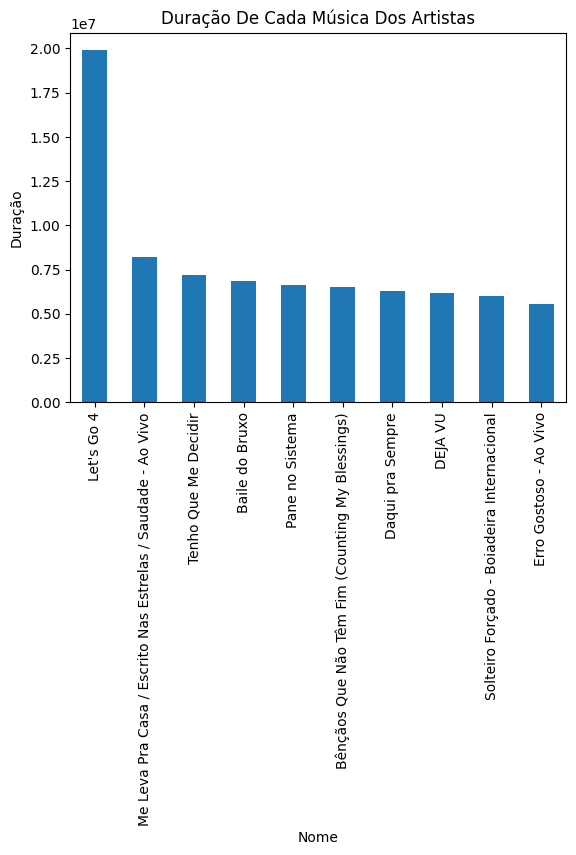

In [ ]:
# Duração De Cada Música Dos Artistas
df.groupby('nome')['duracao'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Nome')
plt.ylabel('Duração')
plt.title('Duração De Cada Música Dos Artistas')
plt.show()

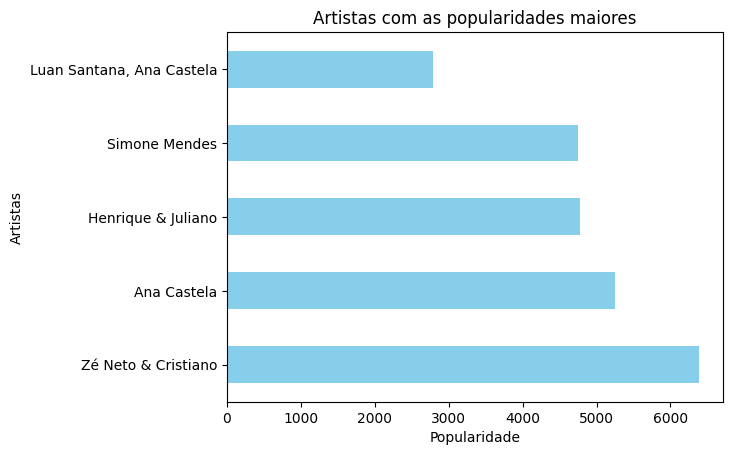

In [ ]:
# Definindo a popuraridade de cada cantor
df.groupby('artistas')['popularidade'].sum().sort_values(ascending=False).head(5).plot(kind='barh', color='skyblue')
plt.xlabel('Popularidade')
plt.ylabel('Artistas')
plt.title('Artistas com as popularidades maiores')
plt.show()

In [ ]:
# Definindo o lançamento de cada música
df.groupby('lancamento')['nome'].sum().sort_values(ascending=False)

lancamento
2023-10-27    Última Noite - Ao VivoÚltima Noite - Ao VivoÚl...
2024-01-12    yes, and?yes, and?yes, and?yes, and?yes, and?y...
2023-12-20    Vestido Curto - Ao VivoVestido Curto - Ao Vivo...
2023-05-04    Tá OKTá OKTá OKTá OKTá OKTá OKTá OKTá OKTá OKT...
2023-07-21    Toca o TrompeteToca o TrompeteToca o TrompeteT...
2023-09-19    Tipo HollywoodTipo HollywoodTipo HollywoodTipo...
2023-11-29    Tenho Que Me DecidirTenho Que Me DecidirTenho ...
2023-12-21    Sozinha - Ao VivoSozinha - Ao VivoSozinha - Ao...
2023-11-03    Sou Musa do VerãoSou Musa do VerãoSou Musa do ...
2023-07-07    Solteiro Forçado - Boiadeira InternacionalSolt...
2024-01-18    Silverado (AgroPlay Verão)Silverado (AgroPlay ...
2023-03-02    Seu Brilho Sumiu - Ao VivoSeu Brilho Sumiu - A...
2023-08-25    Sai Da FrenteSai Da FrenteSai Da FrenteSai Da ...
2023-11-22    Ritmista 1.0Ritmista 1.0Ritmista 1.0Ritmista 1...
2023-10-13    Revezamento de Cama - Ao VivoRevezamento de Ca...
2023-12-24                   

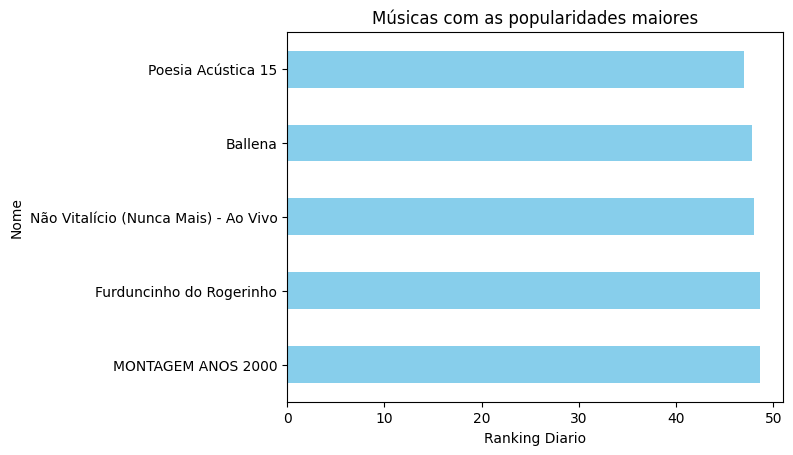

In [ ]:
# Raking diario de cada artista junto com nome da música
df.groupby('nome')['ranking_diario'].mean().sort_values(ascending=False).head(5).plot(kind='barh', color='skyblue')
plt.xlabel('Ranking Diario')
plt.ylabel('Nome')
plt.title('Músicas com as popularidades maiores')
plt.show()